# Orders - Multivariate Regression of review_score

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
''' You can download the solution for yesterday's optional distance_seller_customer function from Kitt 
and paste it into your olist/orders.py file, if you weren't able to complete it '''
# import orders dataset
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)
orders

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.0,15,0.0,delivered,0,0,4,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,13.0,19,0.0,delivered,0,0,4,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,9.0,26,0.0,delivered,1,0,5,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,13.0,26,0.0,delivered,1,0,5,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,2.0,12,0.0,delivered,1,0,5,1,1,19.90,8.72,30.174037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96528,9c5dedf39a927c1b2549525ed64a053c,8.0,18,0.0,delivered,1,0,5,1,1,72.00,13.08,69.481037
96529,63943bddc261676b46f01ca7ac2f7bd8,22.0,23,0.0,delivered,0,0,4,1,1,174.90,20.10,474.098245
96530,83c1379a015df1e13d02aae0204711ab,24.0,30,0.0,delivered,1,0,5,1,1,205.99,65.02,968.051192
96531,11c177c8e97725db2631073c19f07b62,17.0,37,0.0,delivered,0,0,2,2,1,359.98,81.18,370.146853


In [10]:
#orders['number_of_products'].describe()

In [11]:
#diff = orders['number_of_products'] - orders['number_of_sellers']
#diff.describe()

In [12]:
#orders['number_of_sellers'].describe()

Let's recall our simple analysis from yesterday's exercise: 

Based on our correlation matrix below, we notice that `review_score` is mostly correlated with the two features `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated with each other. In this exercise, we will use `statsmodels` to distinguish the effect of one feature, **holding the other one constant**.

<AxesSubplot:>

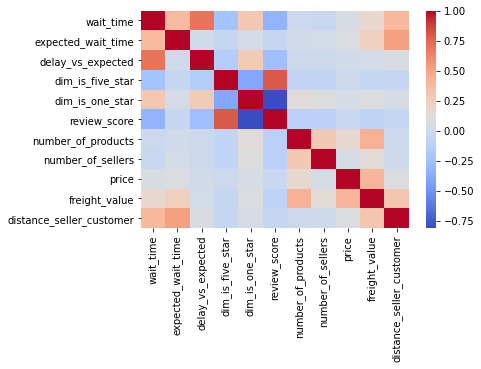

In [13]:
sns.heatmap(orders.corr(), cmap='coolwarm')

(0.0, 5.90775554521926)

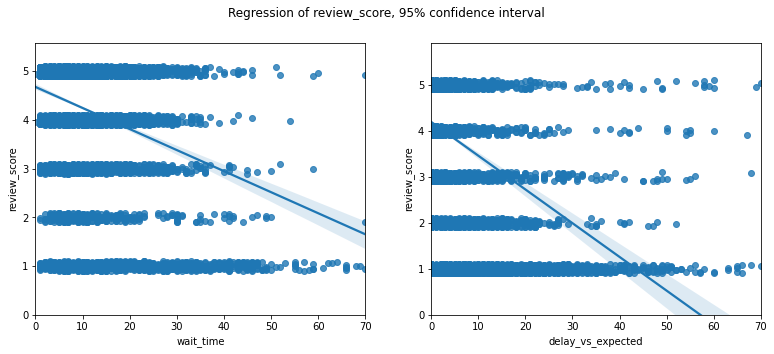

In [14]:
sample = orders.sample(10000, random_state=42)
plt.figure(figsize=(13,5))
plt.suptitle('Regression of review_score, 95% confidence interval')
plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = orders.delay_vs_expected, y= orders.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

## 1 - Univariate regression

❓Use [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) with `statsmodels.formula.api` to quickly make
 - `model1`: an ols regression of `review_score` over `wait_time`
 - `model2`: an ols regression of `review_score` over `delay_vs_expected`

For each, Print the `summary` table and interpret the results:
- Make sure to understand how these results match those of the seaborn regplot
- Read the regression performance metric R-squared, as well as individual regression coefficients, t-values, p-values, and 95% confidence intervals

In [15]:
import statsmodels.formula.api as smf

In [16]:
# YOUR CODE HERE
model1=smf.ols(formula = 'review_score ~ wait_time ', data=orders)
model1 = model1.fit()
model1

In [17]:
print(model1.params)

Intercept    4.692126
wait_time   -0.045499
dtype: float64


In [18]:
# YOUR CODE HERE
model2 = smf.ols(formula = 'review_score ~ delay_vs_expected', data=orders)
model2=model2.fit()
model2

In [19]:
print(model2.params)

Intercept            4.194649
delay_vs_expected   -0.073369
dtype: float64


## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two features is the most explicative for the low `review_score`?

For that purpose, run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the features (independent variables), and `review_score` is the target (dependent variable)

In [20]:
# YOUR CODE HERE
model3 = smf.ols(formula='review_score ~ wait_time + delay_vs_expected', data = orders)
model3=model3.fit()

In [21]:
print(model3.params)

Intercept            4.638411
wait_time           -0.040118
delay_vs_expected   -0.015824
dtype: float64


----
❓Our multivariate regression allows us to isolate the impact of one feature, while controlling the effect of other features. These new coefficients are called **partial correlation** coefficients. Can you notice the difference with the **simple regression** coeffients computed with seaborn above? What can you say about the relative slopes for `wait_time` and `delay_vs_expected`? 


In [15]:
# Your answer

<details>
    <summary>💡 Solution</summary>

- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0191 [0.017 - 0.21] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0388 points 

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`! This interesting finding demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors

---
❓ R-squared is quite low: no more than 12% of the variation of review_score is explained by the combined variations of `wait_time` and `delay_vs_expected`. Let's try to add more features to our regression to improve explainability.

- Create a new OLS `model4` with more features from `orders` dataset.
    - Do not create **data leaks**: do not add features that are directly derived from the `review_score`
    - Do not add two features perfectly colinear with each other
    - Transform each feature $X_i$ into its respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ in order to compare the partial regression coefficients $\beta_i$ together. Otherwise, the $\beta_i$ are not of the same dimension, meaning you'll be comparing apples (e.g. "review_stars per day") with oranges (e.g. "review_stars per BRL")!

In [22]:
# Select features
features = ['wait_time', 'delay_vs_expected','number_of_products', 'number_of_sellers', 'price', 'freight_value', 'distance_seller_customer']

In [23]:
# standardize features (transform them into their respective z-scores)
orders['review_score'].mean()

4.142004662004662

In [24]:
feat_mean = orders[features].mean()
feat_mean

wait_time                    12.090743
delay_vs_expected             0.717524
number_of_products            1.142699
number_of_sellers             1.013965
price                       136.935472
freight_value                22.773011
distance_seller_customer    601.058677
dtype: float64

In [25]:
feat_std= orders[features].std()
feat_std

wait_time                     9.545650
delay_vs_expected             4.648025
number_of_products            0.540518
number_of_sellers             0.123792
price                       208.935017
freight_value                21.553810
distance_seller_customer    595.216682
dtype: float64

In [26]:
z_feat = (orders[features] - feat_mean) / feat_std
z_feat

,wait_time,delay_vs_expected,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,-0.428545,-0.154372,-0.264004,-0.112813,-0.511860,-0.651997,-0.979467
1,0.095254,-0.154372,-0.264004,-0.112813,-0.087278,-0.000604,0.428808
2,-0.323786,-0.154372,-0.264004,-0.112813,0.109912,-0.164844,-0.146045
3,0.095254,-0.154372,-0.264004,-0.112813,-0.440019,0.205392,2.052600
4,-1.057104,-0.154372,-0.264004,-0.112813,-0.560153,-0.651997,-0.959121
...,...,...,...,...,...,...,...
96528,-0.428545,-0.154372,-0.264004,-0.112813,-0.310793,-0.449712,-0.893083
96529,1.038091,-0.154372,-0.264004,-0.112813,0.181705,-0.124016,-0.213301
96530,1.247611,-0.154372,-0.264004,-0.112813,0.330507,1.960071,0.616570
96531,0.514293,-0.154372,1.586072,-0.112813,1.067531,2.709822,-0.387946


In [27]:
z_feat.describe()

,wait_time,delay_vs_expected,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
count,9.652500e+04,9.652500e+04,9.652500e+04,9.652500e+04,9.652500e+04,9.652500e+04,9.652500e+04
mean,-2.598514e-17,2.576431e-17,4.078121e-17,5.742496e-16,-1.840308e-17,-1.227853e-16,-1.115962e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.266623e+00,-1.543718e-01,-2.640036e-01,-1.128127e-01,-6.513292e-01,-1.056565e+00,-1.009815e+00
25%,-6.380648e-01,-1.543718e-01,-2.640036e-01,-1.128127e-01,-4.357119e-01,-4.149156e-01,-6.950415e-01
50%,-2.190258e-01,-1.543718e-01,-2.640036e-01,-1.128127e-01,-2.437862e-01,-2.604185e-01,-2.805496e-01
75%,3.047730e-01,-1.543718e-01,-2.640036e-01,-1.128127e-01,6.205053e-02,5.692679e-02,3.306386e-01
max,2.062817e+01,4.029291e+01,3.673751e+01,3.219949e+01,6.367082e+01,8.222152e+01,1.366879e+01


In [32]:
#z_feat mean should be 0 and std 1
#z_feat.isna().sum()

In [33]:
#z_feat.std()

In [34]:
z_feat['review_score'] = orders['review_score']

In [36]:
# Create and train model4
model4 = smf.ols(formula='review_score ~ wait_time + delay_vs_expected + number_of_products + number_of_sellers + price +freight_value +distance_seller_customer', data = z_feat)
model4=model4.fit()
model4

In [37]:
z_feat.head()

,wait_time,delay_vs_expected,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer,review_score
0,-0.428545,-0.154372,-0.264004,-0.112813,-0.511860,-0.651997,-0.979467,4
1,0.095254,-0.154372,-0.264004,-0.112813,-0.087278,-0.000604,0.428808,4
2,-0.323786,-0.154372,-0.264004,-0.112813,0.109912,-0.164844,-0.146045,5
3,0.095254,-0.154372,-0.264004,-0.112813,-0.440019,0.205392,2.052600,5
4,-1.057104,-0.154372,-0.264004,-0.112813,-0.560153,-0.651997,-0.959121,5


In [38]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2340.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:34:51   Log-Likelihood:            -1.5448e+05
No. Observations:               96525   AIC:                         3.090e+05
Df Residuals:                   96517   BIC:                         3.091e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.1420      0.004   1073.232      0.000       4.134       4.150
wait_time                   -0.4642      0.006    -74.867      0.000      -0.476      -0.452
delay_vs_expected           -0.0274      0.006     -4.814      0.000      -0.039      -0.016
number_of_products          -0.1327      0.005    -29.364      0.000      -0.142      -0.124
number_of_sellers           -0.1321      0.004    -32.769      0.000      -0.140      -0.124
price                       -0.0046      0.004     -1.082      0.279      -0.013       0.004
freight_value                0.0058      0.005      1.152      0.249      -0.004       0.016
distance_seller_customer     0.1028      0.005     22.228      0.000       0.094       0.112
==============================================================================
Omnibus:                    18244.473   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34452.118
Skew:                          -1.173   Prob(JB):                         0.00
Kurtosis:                       4.749   Cond. No.                         2.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

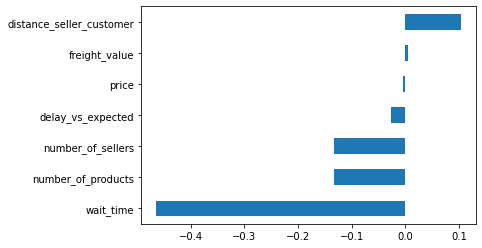

In [40]:
model4.params[1:].sort_values().plot(kind='barh')

---
❓ What are the most important features? (make a bar chart to visualize them well)
- How has the overall regression performance changed?
- Is this regression statistically significant?

In [32]:
# Your answer

<details>
    <summary>💡Explanations</summary>
    

- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score`. 
- Distance also plays a role.
- Depending on your choice of feature, you may not be able to conclude anything about `price` and `freight_value` if their p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics are much greater than 1 (at least one feature has a very low p-value)

- R-squared hasn't increased by much. Most of the explanability of review_score lies outside of the orders dataset.

Low R-squared is common when the number of observations (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant
</details>



## 3 - Check model performance

Regression performance should not be measured only by it's R-squared!  
Always visualize the distribution of the predictions, and especially the residuals.

❓ Compute the residuals, notice how their mean is equal to 0 (always the case in linear regression), and compute the associated RMSE.   
Plot the `residuals` in a histogram.

In [41]:
# Your code
prediction = model4.predict(z_feat)
prediction
actual_score = z_feat['review_score']

In [42]:
actual_score

0        4
1        4
2        5
3        5
4        5
        ..
96528    5
96529    4
96530    5
96531    2
96532    5
Name: review_score, Length: 96525, dtype: int64

<AxesSubplot:>

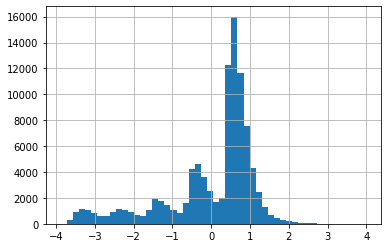

In [43]:
residuals = actual_score - prediction
residuals[residuals<4].hist(bins=50)

In [45]:
import math
mse = np.square(np.subtract(actual_score,prediction)).mean() 
rmse = math.sqrt(mse)

In [46]:
rmse

1.1989989984376037

❓ Can you guess why the residual distplot is such a strange shape? To understand, plot on the same axis the histogram of `review_score` as well as that of the `predicted_review_score` for each row of the dataset

<AxesSubplot:xlabel='review_score', ylabel='Density'>

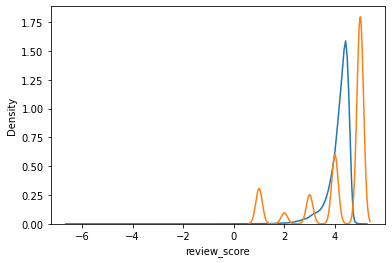

In [52]:
# Your code
sns.kdeplot(prediction, label='prediction')
sns.kdeplot(actual_score,label='actual')

<details>
    <summary>💡Explanations</summary>

☝️ Our model is not so great, for two reasons
- First, because we don't have enough features to explain a significant proportion of the review_scores (low R-squared)
- Secondly, because we are trying to fit a "linear regression" function to a discreet classification problem

Tomorrow, you will discover a new model: the logistic regression classifier
    
</details>

🏁 Great job! Don't forget to *save*, *commit* and *push* this notebook when you are done